In [1]:
import pandas as pd
pd.set_option('max_columns', 25)
pd.set_option('max_rows', 1000)
import numpy as np
from sklearn.cluster import k_means, KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

In [2]:
# Load Data
raw_data = pd.read_csv("Dataset.csv")
raw_data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274.0,Suburban,Married,69.0,32.0,5.0,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0.0,Suburban,Single,94.0,13.0,42.0,0.0,8.0,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767.0,Suburban,Married,108.0,18.0,38.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0.0,Suburban,Married,106.0,18.0,65.0,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,02/03/11,Employed,M,43836.0,Rural,Single,73.0,12.0,44.0,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8289,TQ82322,California,2438.689804,No,Basic,Bachelor,2/19/11,Employed,F,80927.0,Urban,Single,62.0,25.0,8.0,0.0,1.0,Personal Auto,Personal L2,Offer2,Branch,211.660971,Two-Door Car,Medsize
8290,CB77819,California,4736.347990,No,Basic,High School or Below,02/10/11,Unemployed,M,0.0,Suburban,Single,65.0,33.0,1.0,0.0,3.0,Personal Auto,Personal L3,Offer1,Web,585.454243,Two-Door Car,Medsize
8291,VG68427,Arizona,5608.155723,No,Basic,High School or Below,2/17/11,Employed,M,81914.0,Urban,Married,70.0,6.0,33.0,0.0,6.0,Corporate Auto,Corporate L2,Offer4,Branch,198.754660,Four-Door Car,Medsize
8292,WO42164,Oregon,6465.223746,No,Extended,High School or Below,02/07/11,Unemployed,M,0.0,Suburban,Single,92.0,9.0,24.0,0.0,3.0,Personal Auto,Personal L3,Offer1,Call Center,662.400000,Four-Door Car,Medsize


In [3]:
# Sum of Null values in each column
raw_data.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 1
Gender                           1
Income                           1
Location Code                    1
Marital Status                   1
Monthly Premium Auto             1
Months Since Last Claim          1
Months Since Policy Inception    1
Number of Open Complaints        1
Number of Policies               1
Policy Type                      1
Policy                           1
Renew Offer Type                 1
Sales Channel                    1
Total Claim Amount               1
Vehicle Class                    1
Vehicle Size                     1
dtype: int64

In [4]:
raw_data.shape

(8294, 24)

In [5]:
# Drop rows having NULL values
data = raw_data.dropna()
data.shape

(8293, 24)

In [6]:
# Make a copy of the data
x1 = data.copy()

# Delete Unwanted Columns
del x1['Customer']
del x1['Effective To Date']

In [7]:
x2 = pd.get_dummies(x1)
x2

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,State_Nevada,State_Oregon,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274.0,69.0,32.0,5.0,0.0,1.0,384.811147,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0
1,6979.535903,0.0,94.0,13.0,42.0,0.0,8.0,1131.464935,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0
2,12887.431650,48767.0,108.0,18.0,38.0,0.0,2.0,566.472247,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,1,0
3,7645.861827,0.0,106.0,18.0,65.0,0.0,7.0,529.881344,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0,1,0
4,2813.692575,43836.0,73.0,12.0,44.0,0.0,1.0,138.130879,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8288,8804.584902,38638.0,74.0,5.0,84.0,0.0,2.0,355.200000,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,1,0
8289,2438.689804,80927.0,62.0,25.0,8.0,0.0,1.0,211.660971,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0,1,0
8290,4736.347990,0.0,65.0,33.0,1.0,0.0,3.0,585.454243,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0,1,0
8291,5608.155723,81914.0,70.0,6.0,33.0,0.0,6.0,198.754660,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0,1,0


In [8]:
# Estimate Optimum number of clusters
cluster_range = range(1, 20)
cluster_errors = []

for noOfClusters in cluster_range:
    clusters = KMeans(noOfClusters).fit(x2)
    cluster_errors.append(clusters.inertia_)
    
cluster_DF = pd.DataFrame({"noOfClusters": cluster_range, "cluster_errors": cluster_errors})
cluster_DF

,noOfClusters,cluster_errors
0,1,8.048772e+12
1,2,2.340241e+12
2,3,1.229309e+12
3,4,7.829846e+11
4,5,6.237662e+11
5,6,5.200878e+11
6,7,4.388784e+11
7,8,3.808712e+11
8,9,3.313219e+11
9,10,2.948977e+11


Text(0.5, 1.0, 'Elbow Graph')

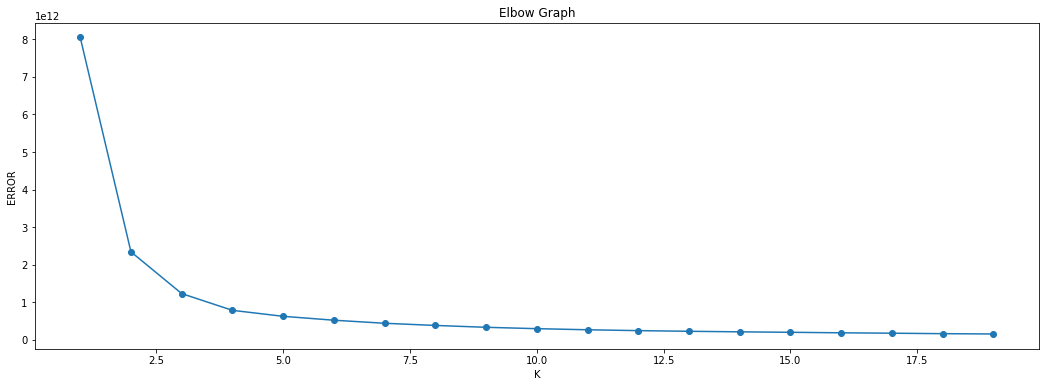

In [9]:
plt.figure(figsize=(18, 6))
plt.plot(cluster_DF.noOfClusters, cluster_DF.cluster_errors, marker = 'o')
plt.xlabel('K')
plt.ylabel('ERROR')
plt.title('Elbow Graph')

In [10]:
# Number of Clusters
n = 3

In [11]:
# Classification using K_Means 
clf = KMeans(n_clusters=n).fit(x2)

In [12]:
centroids = clf.cluster_centers_
labels = clf.labels_

In [13]:
# Using in-built method to calculate DB-Index
davies_bouldin_score(x2, labels)

0.5701197543407189

# End